# 2维Kmeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


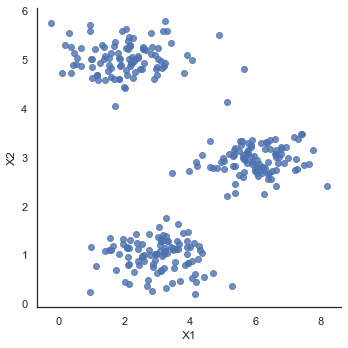

In [4]:
mat = sio.loadmat('./data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

sns.set(context="notebook", style="white")
sns.lmplot(x='X1', y='X2', data=data2, fit_reg=False)
plt.show()

# 0.random init

for initial centroids

In [44]:
def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

# k-means fn ----------------
def random_init(data, k):
    # choose k sample from data set as init centroids
    # Args: data: DateFrame k: int
    # Return: k smaples: ndarray
    
    return data.sample(k).values

def _find_your_cluster(x, centroids):
    distances = np.apply_along_axis(func1d=np.linalg.norm, axis=1, arr=centroids - x)
    
    return np.argmin(distances)

def assign_cluster(data, centroids):
    # assign cluster for each node in data return C ndarray
    
    return np.apply_along_axis(lambda x: _find_your_cluster(x, centroids), axis=1, arr=data.values)

def new_centroids(data, C):
    data_with_c = combine_data_C(data, C)
    
    return data_with_c.groupby('C', as_index=False).mean().sort_values(by='C').drop('C', axis=1).values

def cost(data, centroids, C):
    m = data.shape[0]
    
    expand_C_with_centroids = centroids[C]
    
    distances = np.apply_along_axis(func1d=np.linalg.norm, axis=1, arr=data.values - expand_C_with_centroids)
    
    return distances.sum() / m

def _k_means_iter(data, k, epoch=100, tol=0.0001):
    centroids = random_init(data, k)
    cost_progress = []
    
    for i in range(epoch):
        print('running epoch{}'.format(i))
        
        C = assign_cluster(data, centroids)
        centroids = new_centroids(data, C)
        cost_progress.append(cost(data, centroids, C))
        
        if len(cost_progress) > 1:
            if(np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol:
                break
        
    return C, centroids, cost_progress[-1]

def k_means(data, k, epoch=100, n_init=10):
    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])
    
    least_cost_idx = np.argmin(tries[:,-1])
    
    return tries[least_cost_idx]

In [6]:
random_init(data2, 3)

array([[1.59141937, 4.83212573],
       [3.31058167, 1.03124461],
       [4.60630534, 3.329458  ]])

# cluster assignment

find closet cluster experiment

In [7]:
init_centroids = random_init(data2, 3)
init_centroids

array([[6.24257071, 2.79179269],
       [5.38736041, 2.26737346],
       [6.5110074 , 2.72731907]])

In [8]:
x = np.array([1, 1])

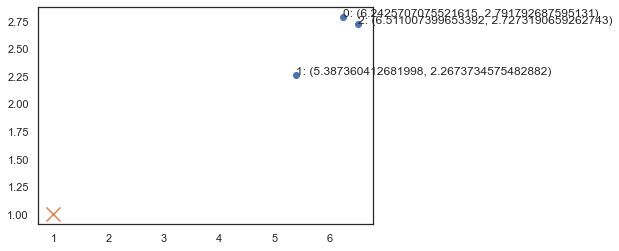

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x=init_centroids[:, 0], y=init_centroids[:, 1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}: ({}, {})'.format(i, node[0], node[1]), node)
    
ax.scatter(x[0], x[1], marker='x', s=200)
plt.show()

In [27]:
_find_your_cluster(x, init_centroids)

1

# epoch cluster assigning

In [28]:
C = assign_cluster(data2, init_centroids)
data_with_c = combine_data_C(data2, C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,1
1,5.658583,4.799964,0
2,6.352579,3.290854,0
3,2.904017,4.612204,1
4,3.231979,4.939894,1


See the first round clustering result

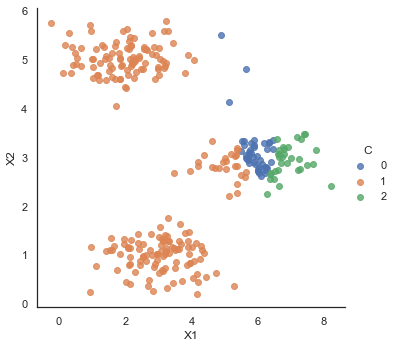

In [30]:
sns.lmplot(x='X1', y='X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# calculate new centroid

In [31]:
new_centroids(data2, C)

array([[5.91643489, 3.1352491 ],
       [2.783331  , 2.96451603],
       [6.92260608, 2.94149023]])

# putting all together, take1

this is just 1 k-means, if the random init pick the bad strating centroids, the final clustering may be very sub-optimal

In [39]:
final_C, final_centroid, _ = _k_means_iter(data2, 3)
data_with_c = combine_data_C(data2, final_C)

running epoch0
running epoch1
running epoch2
running epoch3


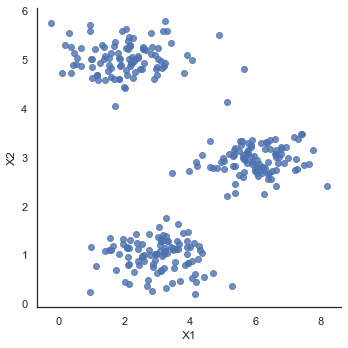

In [40]:
sns.lmplot(x='X1', y='X2', data=data_with_c, fit_reg=False)
plt.show()

# calculate the cost

In [41]:
cost(data2, final_centroid, final_C)

0.794176363371587

# K-means with multiple tries of random init, pick the best one with least cost

In [45]:
best_C, best_centroids, least_cost = k_means(data2, 3)

running epoch0
running epoch1
running epoch2
running epoch3
running epoch0
running epoch1
running epoch2
running epoch0
running epoch1
running epoch2
running epoch3
running epoch4
running epoch5
running epoch6
running epoch0
running epoch1
running epoch2
running epoch0
running epoch1
running epoch2
running epoch3
running epoch4
running epoch5
running epoch0
running epoch1
running epoch2
running epoch0
running epoch1
running epoch2
running epoch3
running epoch0
running epoch1
running epoch2
running epoch3
running epoch0
running epoch1
running epoch2
running epoch3
running epoch4
running epoch0
running epoch1
running epoch2
running epoch3
running epoch4
running epoch5


C:\Users\yzj\AppData\Local\Temp/ipykernel_15020/2292731186.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])


In [46]:
least_cost

0.794176363371587

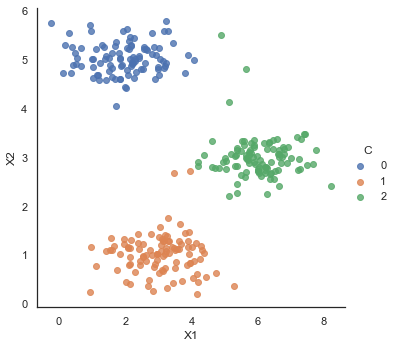

In [47]:
data_with_c = combine_data_C(data2, best_C)
sns.lmplot(x='X1', y='X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# try sklearn kmeans

In [48]:
from sklearn.cluster import KMeans

In [49]:
sk_means = KMeans(n_clusters=3)

In [50]:
sk_means.fit(data2)

KMeans(n_clusters=3)

In [51]:
sk_C = sk_means.predict(data2)

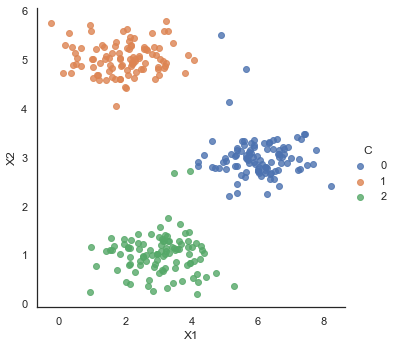

In [52]:
data_with_c = combine_data_C(data2, sk_C)
sns.lmplot(x='X1', y='X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()